# Rock Paper Scissor recognition using nn


In [6]:
# Getting the data

from os import listdir
from PIL import Image as PImage
import numpy as np

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image).convert('L')
        loadedImages.append(np.array(img))

    return loadedImages

def dataSplit(data, percentage):
    # splits input data into train and validation set
    treshold = round(data.shape[0] * percentage)
    trainData = data[:treshold,]
    valiData = data[-(data.shape[0] - treshold):,]
    return trainData, valiData

def shuffle(x, y):
    p = np.random.permutation(len(y))
    return x[p], y[p]


path = "C:/Users/ondra/Python Projects/datasets/RockPaperScissors/"

# your images in an array
imgs_paper = np.array(loadImages(path + "paper/"))
imgs_rock = np.array(loadImages(path + "rock/"))
imgs_scissors = np.array(loadImages(path + "scissors/"))




In [10]:
# Lets check the distribution of images
numRock = len(imgs_rock)
numPaper = len(imgs_paper)
numSci = len(imgs_scissors)
print(numRock,
numPaper,
numSci)

712 712 712


In [9]:
# lets make the number even
imgs_rock = imgs_rock[:712]
imgs_scissors = imgs_scissors[:712]

In [12]:
# load labels to Y
Y = [[0] * imgs_paper.shape[0], [1] * imgs_rock.shape[0], [2] * imgs_scissors.shape[0]]
Y = np.hstack(Y)
# put data into one array
imgs = np.concatenate((imgs_paper, imgs_rock, imgs_scissors), axis=0)

In [14]:
# shuffle the data
shuffleData, shuffleY = shuffle(imgs, Y)
# split to train and test
trainData, testData = dataSplit(shuffleData, 0.85)
trainY, testY = dataSplit(shuffleY, 0.85)
# split train to train and vali
trainData, valiData = dataSplit(trainData, 0.8)
trainY, valiY = dataSplit(trainY, 0.8)



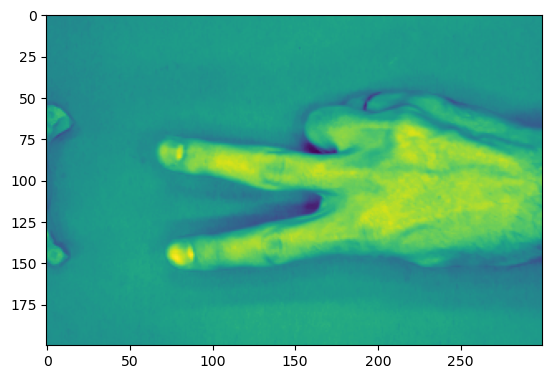

In [26]:
# Now we have ready data to train

import matplotlib.pyplot as plt
plt.imshow(trainData[555])
plt.show()




In [27]:
# scale the data

trainData = (trainData.astype(np.float32) - 127.5) / 127.5
testData = (testData.astype(np.float32) - 127.5) / 127.5
valiData = (valiData.astype(np.float32) - 127.5) / 127.5

In [31]:
# introduce NN


